<a href="https://colab.research.google.com/github/Joaquin-Estevez/ELS-cleaned/blob/main/epaalam_EDA_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELS:2002 EDA V4**


---
##Author: Emmanuel Paalam
##Dataset: has 4012 columns and 16197 rows

##Import necessary libraries, data file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from google.colab import drive
wr.filterwarnings('ignore')

In [2]:
drive.mount("/content/drive")
## Insert pathway to dataset below
df = pd.read_csv("/content/drive/My Drive/research/SURP 2024/colab/data/cleaned/epaalam-cleaned_els_02_12_byf3pststu_v1_0.csv")

Mounted at /content/drive


##Analysis

In [3]:
df.shape

(13119, 224)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Columns: 224 entries, BYINCOME to BYF10M
dtypes: float64(212), int64(12)
memory usage: 22.4 MB


In [5]:
df.describe()

,BYINCOME,BYGRDRPT,BYSCHPRG,BYTXMSTD,BYTX1MPP,BYTX2MPP,BYTX3MPP,BYTX4MPP,BYTX5MPP,BYTXRSTD,...,BYF10D,BYF10E,BYF10F,BYF10G,BYF10H,BYF10I,BYF10J,BYF10K,BYF10L,BYF10M
count,13119.000000,13119.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,...,12566.000000,12767.000000,12710.000000,12747.000000,12515.000000,12577.000000,12560.000000,12708.000000,12769.000000,12700.000000
mean,9.177757,0.127601,1.751712,51.437114,0.936725,0.724924,0.523046,0.238357,0.012297,51.330370,...,0.254258,0.675883,0.434697,0.929474,0.845146,0.555697,0.863774,0.868901,0.135641,0.155039
std,2.349470,0.358334,0.610310,9.780615,0.168198,0.393470,0.457109,0.346514,0.075333,9.791346,...,0.435460,0.468062,0.495737,0.256042,0.361780,0.496908,0.343042,0.337521,0.342420,0.361956
min,2.000000,0.000000,1.000000,19.380000,0.004000,0.000000,0.000000,0.000000,0.000000,22.570000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,1.000000,44.970000,0.978000,0.406750,0.003000,0.001000,0.000000,44.620000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,10.000000,0.000000,2.000000,51.720000,0.998000,0.988000,0.643000,0.023000,0.000000,51.650000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,0.000000,2.000000,58.442500,1.000000,1.000000,0.999000,0.417000,0.000000,58.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,13.000000,2.000000,3.000000,86.680000,1.000000,1.000000,1.000000,1.000000,0.996000,78.760000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()


BYINCOME      0
BYGRDRPT      0
BYSCHPRG    267
BYTXMSTD    267
BYTX1MPP    267
           ... 
BYF10I      542
BYF10J      559
BYF10K      411
BYF10L      350
BYF10M      419
Length: 224, dtype: int64

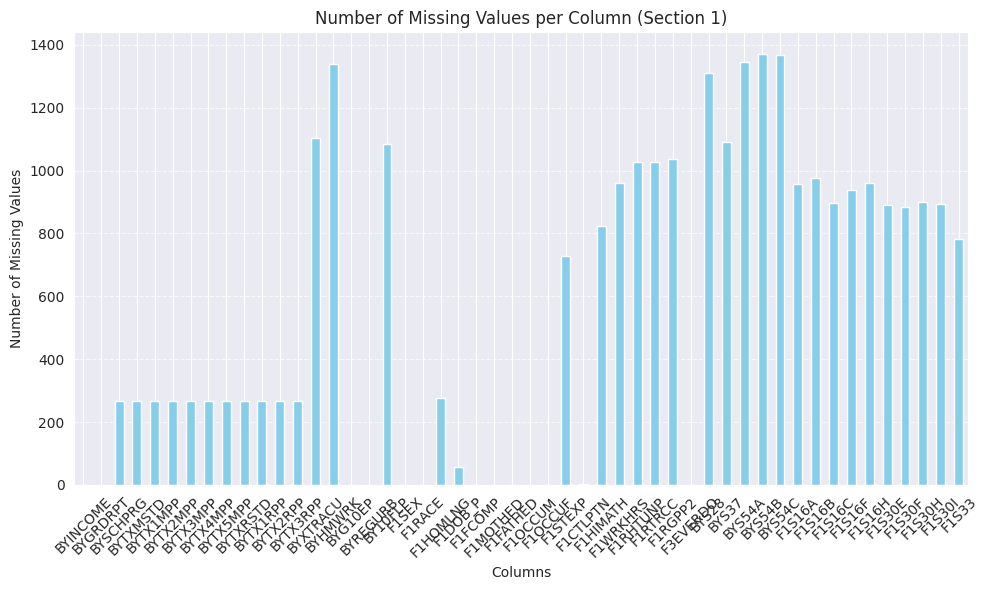

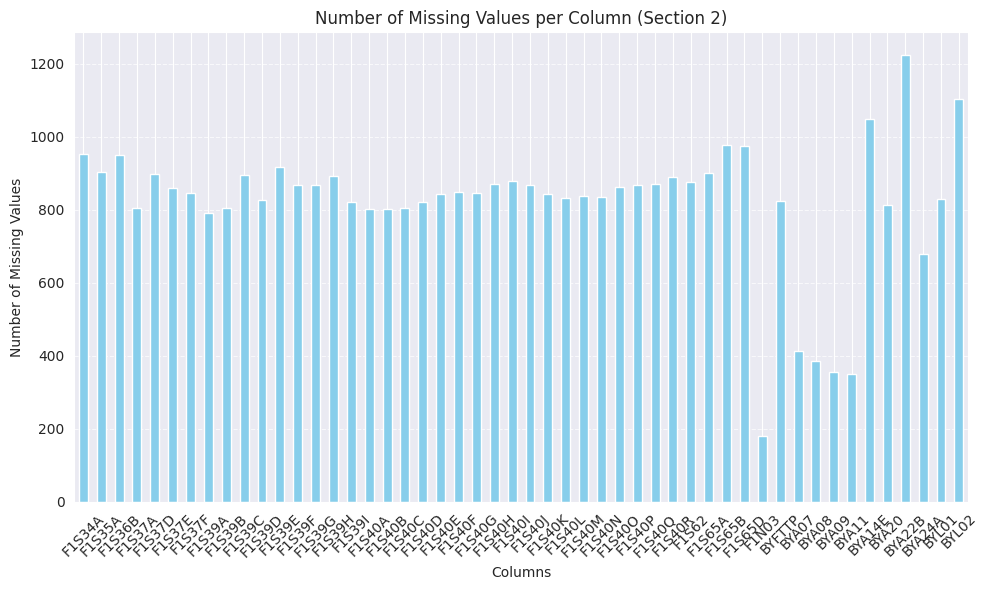

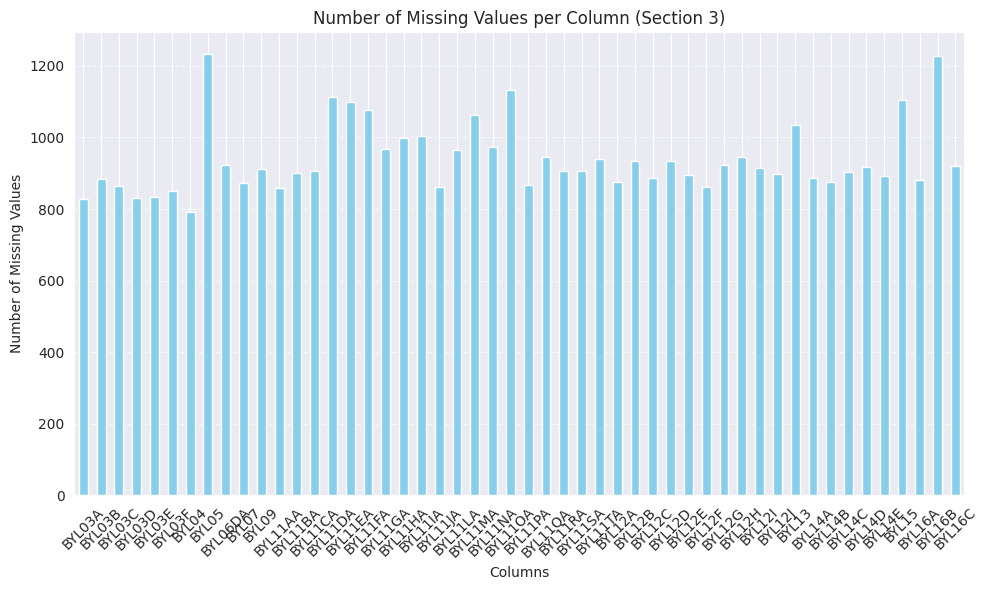

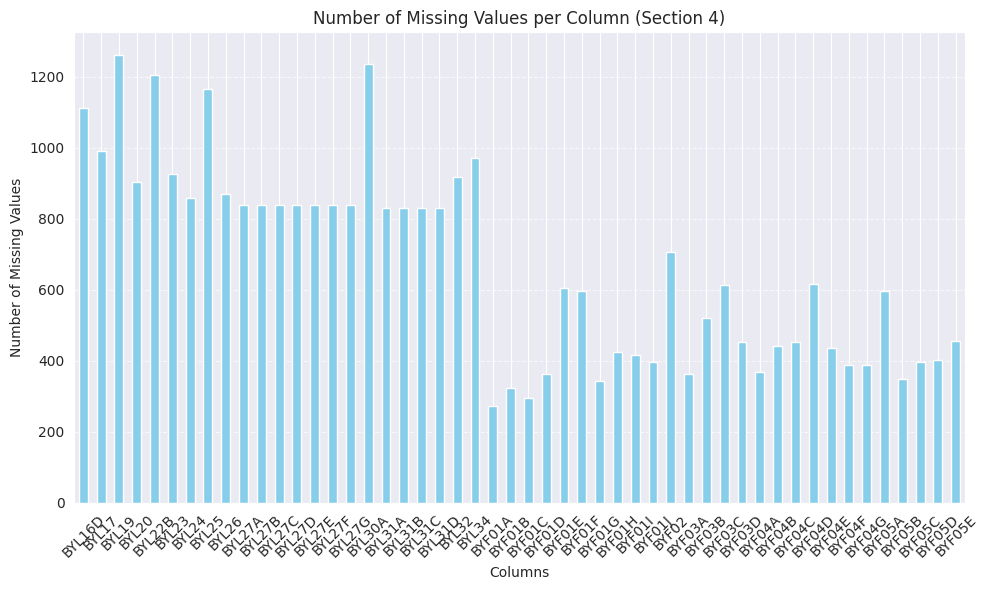

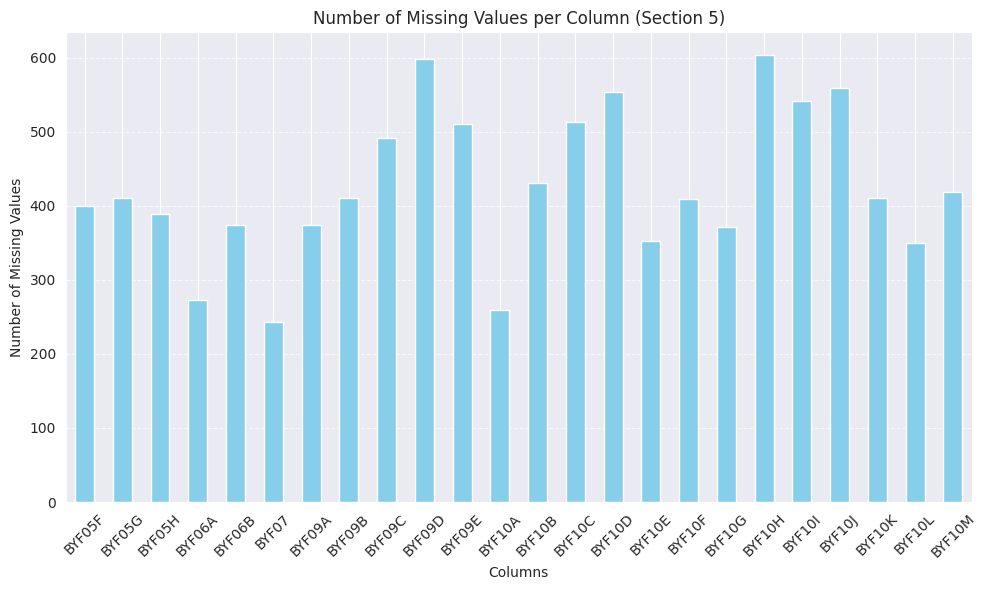

In [19]:
##Divide columns into partitions of 50 or less
num_sections = (len(df.columns) // 50) + 1

## Make a bar graph for each
for i in range(num_sections):
    start_idx = i * 50
    end_idx = min((i + 1) * 50, len(df.columns))
    section_df = df.iloc[:, start_idx:end_idx]

    # Count missing values per column in the section
    missing_values = section_df.isnull().sum()

    # Plotting
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Missing Values per Column (Section {i+1})')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<Axes: >

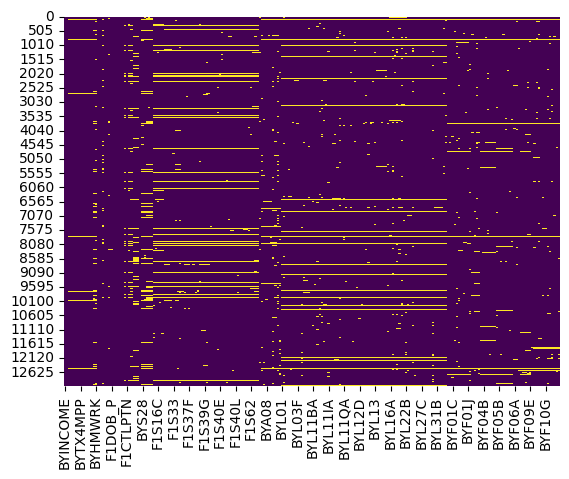

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [8]:
single_value_columns = df.columns[df.nunique(dropna=False) == 1]

print("Columns with all identical values:")
print(single_value_columns)

Columns with all identical values:
Index([], dtype='object')


In [9]:
df.nunique()

BYINCOME      12
BYGRDRPT       3
BYSCHPRG       3
BYTXMSTD    3929
BYTX1MPP     805
            ... 
BYF10I         2
BYF10J         2
BYF10K         2
BYF10L         2
BYF10M         2
Length: 224, dtype: int64

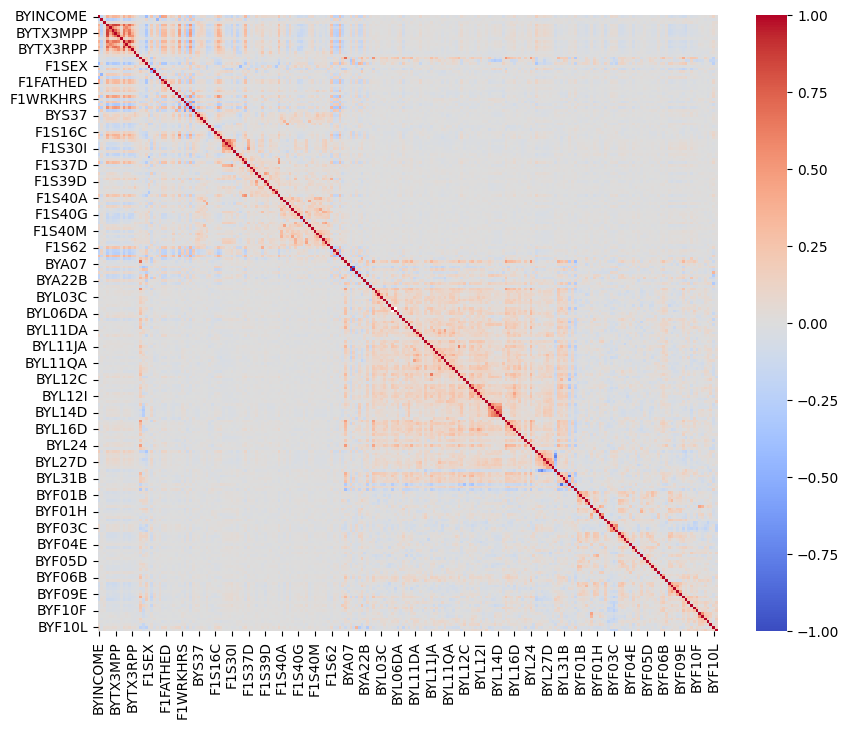

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [11]:
correlated = df.corr()

# Set the threshold for high correlation
threshold = 0.75
print(len(correlated))
# Find pairs of highly correlated variables
high_corr_pairs = [(i, j) for i in correlated for j in correlated
                   if i != j and abs(correlated.loc[i, j]) > threshold]

print("Highly correlated pairs:", high_corr_pairs)
print(len(high_corr_pairs))

224
Highly correlated pairs: [('BYTXMSTD', 'BYTX2MPP'), ('BYTXMSTD', 'BYTX3MPP'), ('BYTXMSTD', 'BYTX4MPP'), ('BYTX2MPP', 'BYTXMSTD'), ('BYTX2MPP', 'BYTX3MPP'), ('BYTX3MPP', 'BYTXMSTD'), ('BYTX3MPP', 'BYTX2MPP'), ('BYTX4MPP', 'BYTXMSTD'), ('BYTXRSTD', 'BYTX2RPP'), ('BYTX2RPP', 'BYTXRSTD'), ('BYA08', 'BYA09'), ('BYA09', 'BYA08'), ('BYL31A', 'BYL31D'), ('BYL31D', 'BYL31A')]
14


In [12]:
pd.set_option('display.max_rows', None)

df.corr()['F3EVERDO'].sort_values(ascending=False).head(100)

F3EVERDO    1.000000
F1CTLPTN    0.349733
F1S65A      0.248812
BYGRDRPT    0.217185
F1RTRCC     0.206526
F1S65B      0.205700
BY10FLP     0.165149
F1S30I      0.154855
F1FCOMP     0.143530
F1WRKHRS    0.139017
F1S30H      0.136151
F1S34A      0.122109
F1S30F      0.121042
F1N03       0.102584
BYA14E      0.091807
BYA20       0.085326
BYG10EP     0.079641
F1S33       0.068931
F1S16B      0.068672
BYA09       0.068124
BYL09       0.067142
F1S37D      0.064335
F1S40G      0.060957
F1S16A      0.059543
F1S40H      0.056535
BYF09A      0.055460
BYF10B      0.054071
F1S35A      0.053875
BYF10A      0.051725
BYREGURB    0.050117
BYL15       0.047417
BYF09B      0.046602
BYF04C      0.046475
F1S40J      0.045131
F1S40Q      0.044673
BYF09E      0.043991
BYF01G      0.043883
BYF09D      0.043725
BYF06B      0.042409
BYF10E      0.041896
BYF04F      0.041574
BYS54C      0.038881
F1S30E      0.038576
BYFTTP      0.036839
F1S40I      0.036516
BYF05G      0.035670
BYL17       0.034339
BYA24A      0

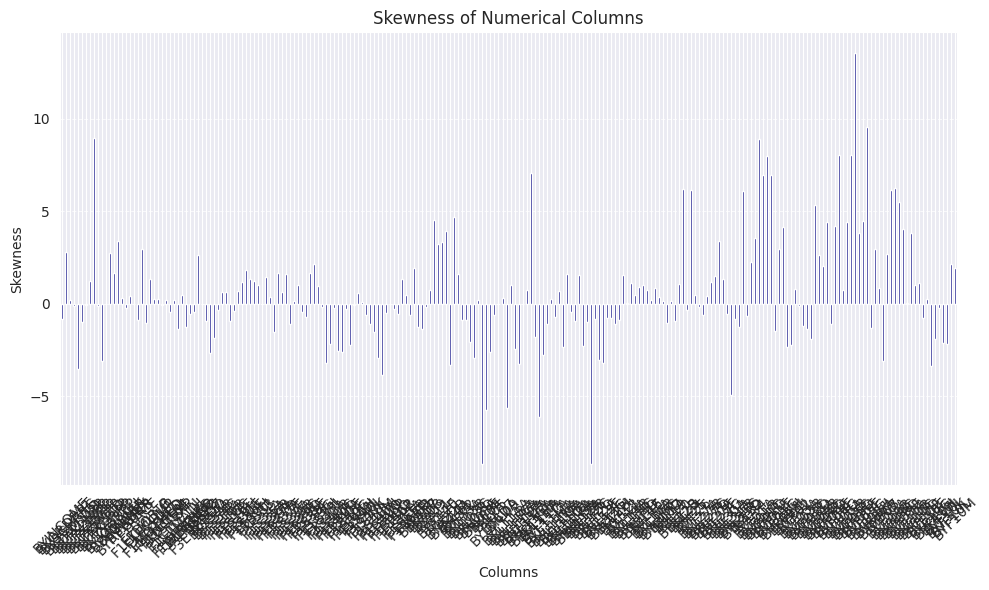

In [28]:
sns.set_style("darkgrid")

# Calculate skewness for each numerical column
skewness_values = df.select_dtypes(include=["int64", "float64"]).skew()

# Plot skewness values
plt.figure(figsize=(10, 6))
skewness_values.plot(kind='bar', color='navy')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

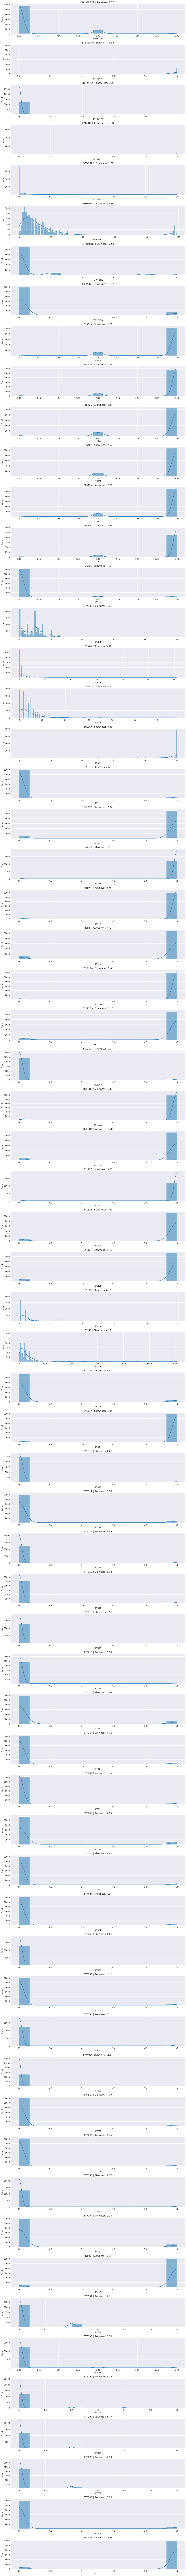

In [32]:
sns.set_style("darkgrid")

skewed_columns = skewness_values[abs(skewness_values) >= 2.5].index

# Plot kernel density plot for each selected column
plt.figure(figsize=(14, len(skewed_columns) * 3))
for idx, column in enumerate(skewed_columns, 1):
    plt.subplot(len(skewed_columns), 1, idx)
    sns.histplot(df[column], kde=True)
    plt.title(f"{column} | Skewness: {round(skewness_values[column], 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()